In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('salaries.csv', encoding='latin-1')
df.head()

,salary_id,employer_name,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,job_title_rank,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,stock_value_bonus,comments,submitted_at
0,1,opower,"san francisco, ca",CA,US,38,-122,systems engineer,Engineering,NaN,13,2,125000,5000,0,5000 shares,Don't work here.,3/21/16 12:58
1,3,walmart,"bentonville, ar",AR,US,36,-94,senior developer,Software,Senior,15,8,65000,NaN,5000,"3,000",NaN,3/21/16 12:58
2,4,vertical knowledge,"cleveland, oh",OH,US,41,-82,software engineer,Software,NaN,4,1,86000,5000,6000,0,NaN,3/21/16 12:59
3,6,netapp,waltham,NaN,NaN,NaN,NaN,mts,Other,NaN,4,0,105000,5000,8500,0,NaN,3/21/16 13:00
4,12,apple,cupertino,NaN,NaN,NaN,NaN,software engineer,Software,NaN,4,3,110000,5000,7000,150000,NaN,3/21/16 13:02


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   salary_id                  1655 non-null   int64  
 1   employer_name              1651 non-null   object 
 2   location_name              1655 non-null   object 
 3   location_state             558 non-null    object 
 4   location_country           792 non-null    object 
 5   location_latitude          792 non-null    float64
 6   location_longitude         792 non-null    float64
 7   job_title                  1655 non-null   object 
 8   job_title_category         1655 non-null   object 
 9   job_title_rank             425 non-null    object 
 10  total_experience_years     1608 non-null   float64
 11  employer_experience_years  1608 non-null   float64
 12  annual_base_pay            1651 non-null   float64
 13  signing_bonus              1332 non-null   float

In [60]:
df.isna().sum()  # missing values in the dataset

salary_id                       0
employer_name                   4
location_name                   0
location_state               1097
location_country              863
location_latitude             863
location_longitude            863
job_title                       0
job_title_category              0
job_title_rank               1230
total_experience_years         47
employer_experience_years      47
annual_base_pay                 4
signing_bonus                 323
annual_bonus                  319
stock_value_bonus             402
comments                     1363
submitted_at                    0
dtype: int64

In [61]:
round(df.isnull().sum()/len(df.index), 2)*100  # missing values in the dataset in percentage

salary_id                    0
employer_name                0
location_name                0
location_state              66
location_country            52
location_latitude           52
location_longitude          52
job_title                    0
job_title_category           0
job_title_rank              74
total_experience_years       3
employer_experience_years    3
annual_base_pay              0
signing_bonus               20
annual_bonus                19
stock_value_bonus           24
comments                    82
submitted_at                 0
dtype: float64

In [62]:
df.describe()

,salary_id,location_latitude,location_longitude,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
count,1655,792,792,1608,1608,1651,1332,1336
mean,1684,38,-65,7,3,6325004,22406,11776
std,933,17,67,6,3,246135277,309799,69216
min,1,-41,-123,0,0,0,0,0
25%,897,37,-103,3,1,61000,0,0
50%,1711,39,-95,5,2,99480,0,500
75%,2477,45,-65,10,3,130000,5000,10000
max,3298,65,174,56,58,9999999999,8999999,2000000


<Axes: >

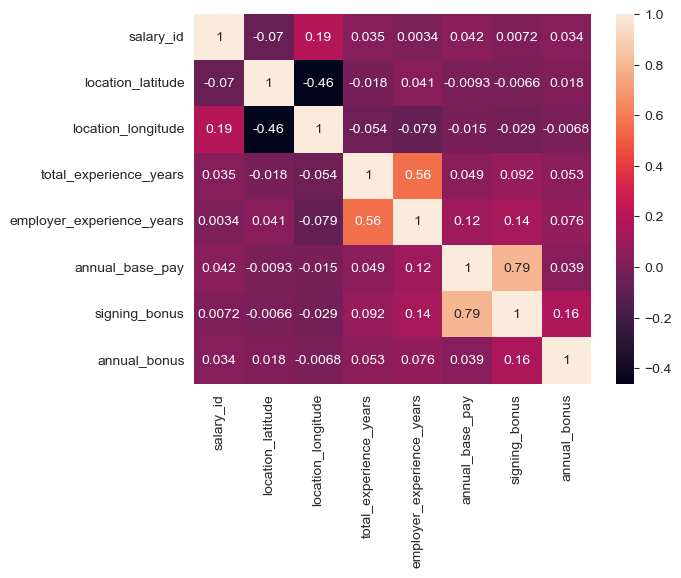

In [63]:
sns.heatmap(df.corr(), annot=True)  # correlation matrix

In [64]:
pd.set_option("display.float_format", lambda x: "%0.f" % x)  # to remove scientific notation. For example, 1.234567e+05 will be 123456. "%0.f" means no decimal places.

In [65]:
df["annual_base_pay"].sort_values()

382             0
1361            0
1143            0
18             24
306            28
          ...    
1645   9999999999
522           NaN
646           NaN
1273          NaN
1423          NaN
Name: annual_base_pay, Length: 1655, dtype: float64

In [66]:
df = df[(df["annual_base_pay"] > 5000) & (df["annual_base_pay"] < 90000000)]  # removing outliers
df

,salary_id,employer_name,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,job_title_rank,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,stock_value_bonus,comments,submitted_at
0,1,opower,"san francisco, ca",CA,US,38,-122,systems engineer,Engineering,NaN,13,2,125000,5000,0,5000 shares,Don't work here.,3/21/16 12:58
1,3,walmart,"bentonville, ar",AR,US,36,-94,senior developer,Software,Senior,15,8,65000,NaN,5000,"3,000",NaN,3/21/16 12:58
2,4,vertical knowledge,"cleveland, oh",OH,US,41,-82,software engineer,Software,NaN,4,1,86000,5000,6000,0,NaN,3/21/16 12:59
3,6,netapp,waltham,NaN,NaN,NaN,NaN,mts,Other,NaN,4,0,105000,5000,8500,0,NaN,3/21/16 13:00
4,12,apple,cupertino,NaN,NaN,NaN,NaN,software engineer,Software,NaN,4,3,110000,5000,7000,150000,NaN,3/21/16 13:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,3285,facebook,menlo park,NaN,NaN,NaN,NaN,software engineer,Software,NaN,4,2,130000,20000,13000,100000,NaN,3/23/16 8:02
1650,3289,sparkfun electronics,"boulder, co",CO,US,40,-105,junior software developer,Software,Junior,1,0,60500,0,800,0,NaN,3/23/16 8:24
1651,3290,intel,europe,NaN,NaN,NaN,NaN,staff software enginer,Software,NaN,6,4,164000,0,20000,30000 USD,NaN,3/23/16 8:27
1652,3293,$2bn valuation tech company,nyc,NaN,NaN,NaN,NaN,sr. frontend eng,Web,Senior,7,1,150000,0,0,0,NaN,3/23/16 8:41


In [67]:
df["annual_base_pay"].sort_values()

590        5160
407        5600
1642       6000
126        6000
1341       6031
         ...   
1191    7500000
298     9000000
221     9250000
1088   10280000
1639   50000000
Name: annual_base_pay, Length: 1601, dtype: float64

In [68]:
df.columns

Index(['salary_id', 'employer_name', 'location_name', 'location_state',
       'location_country', 'location_latitude', 'location_longitude',
       'job_title', 'job_title_category', 'job_title_rank',
       'total_experience_years', 'employer_experience_years',
       'annual_base_pay', 'signing_bonus', 'annual_bonus', 'stock_value_bonus',
       'comments', 'submitted_at'],
      dtype='object')

In [69]:
df["location_state"].unique  # lots of states in the dataset. So, we will remove this column

<bound method Series.unique of 0        CA
1        AR
2        OH
3       NaN
4       NaN
       ... 
1648    NaN
1650     CO
1651    NaN
1652    NaN
1653     MD
Name: location_state, Length: 1601, dtype: object>

In [70]:
df= df.drop(["salary_id", "location_state", "location_country", "location_latitude","location_longitude",
    "job_title_rank", "location_name", "stock_value_bonus", "comments", "submitted_at"], axis=1)

In [71]:
df.columns

Index(['employer_name', 'job_title', 'job_title_category',
       'total_experience_years', 'employer_experience_years',
       'annual_base_pay', 'signing_bonus', 'annual_bonus'],
      dtype='object')

In [72]:
df.head()

,employer_name,job_title,job_title_category,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
0,opower,systems engineer,Engineering,13,2,125000,5000,0
1,walmart,senior developer,Software,15,8,65000,NaN,5000
2,vertical knowledge,software engineer,Software,4,1,86000,5000,6000
3,netapp,mts,Other,4,0,105000,5000,8500
4,apple,software engineer,Software,4,3,110000,5000,7000


In [73]:
df.isna().sum()  # missing values in the dataset

employer_name                  4
job_title                      0
job_title_category             0
total_experience_years        44
employer_experience_years     44
annual_base_pay                0
signing_bonus                304
annual_bonus                 303
dtype: int64

In [74]:
df = df.dropna(subset=["employer_name", "annual_base_pay"])  # removing missing values. Rows with missing values in employer_name and annual_base_pay are removed

In [75]:
df.isna().sum()  # missing values in the dataset

employer_name                  0
job_title                      0
job_title_category             0
total_experience_years        44
employer_experience_years     44
annual_base_pay                0
signing_bonus                303
annual_bonus                 302
dtype: int64

In [76]:
df[["signing_bonus", "annual_bonus"]] = df[["signing_bonus", "annual_bonus"]].fillna(0)  # filling missing values with 0

In [77]:
df.isna().sum()  # missing values in the dataset

employer_name                 0
job_title                     0
job_title_category            0
total_experience_years       44
employer_experience_years    44
annual_base_pay               0
signing_bonus                 0
annual_bonus                  0
dtype: int64

In [79]:
df[["total_experience_years",'employer_experience_years']].mean()  # mean of total_experience_years and employer_experience_years

total_experience_years      7
employer_experience_years   3
dtype: float64

In [80]:
df[["total_experience_years",'employer_experience_years']] = df[["total_experience_years",'employer_experience_years']].fillna(df[["total_experience_years",'employer_experience_years']].mean())  # filling missing values with mean. We filled in the blank data according to the average of the non-blank data

In [81]:
df.isna().sum()  # missing values in the dataset

employer_name                0
job_title                    0
job_title_category           0
total_experience_years       0
employer_experience_years    0
annual_base_pay              0
signing_bonus                0
annual_bonus                 0
dtype: int64

Scatter Plot

In [84]:
df.columns

Index(['employer_name', 'job_title', 'job_title_category',
       'total_experience_years', 'employer_experience_years',
       'annual_base_pay', 'signing_bonus', 'annual_bonus'],
      dtype='object')

In [85]:
df.rename(columns = {
    'employer_name':'company',
    'job_title':'title',
    'job_title_category':'category',
    'total_experience_years':'total_exp',
    'employer_experience_years':'local_exp',
    'annual_base_pay':'salary'
}, inplace = True)  # to read the column names more easily

In [86]:
df.tail(2)

,company,title,category,total_exp,local_exp,salary,signing_bonus,annual_bonus
1652,$2bn valuation tech company,sr. frontend eng,Web,7,1,150000,0,0
1653,of maryland,scientific programmer (faculty research assist...,Applied Science,5,1,75000,0,0


<Axes: xlabel='total_exp', ylabel='local_exp'>

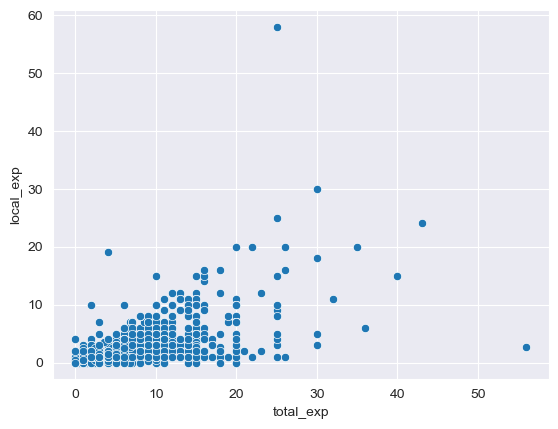

In [87]:
sns.scatterplot(data=df, x="total_exp", y="local_exp")  # scatter plot. The local work experience is 20 years and the total experience cannot be 5 years. We have to delete these values

We'll remove what's above the curve

In [90]:
df["local_exp"].idxmax()  # index of the maximum value of local_exp

1596

In [92]:
df.loc[1596:1596]  # this data is wrong. We will delete it

,company,title,category,total_exp,local_exp,salary,signing_bonus,annual_bonus
1596,tom,tom,Other,25,58,250000,250478,150000


In [93]:
df[df["local_exp"] > df["total_exp"]]  # we will delete the data where the local_exp is greater than the total_exp

,company,title,category,total_exp,local_exp,salary,signing_bonus,annual_bonus
58,amazon,software development engineer,Software,0,1,95000,22000,20000
118,sunpower,financial engineer,Engineering,0,1,87000,0,8000
121,pricespy,agent developer,Software,0,1,300000,0,0
134,iqmetrix,software developer,Software,0,1,55000,0,0
187,microsoft,product manager,Management,0,1,105000,20000,0
222,optum,junior systems engineer,Engineering,1,3,80000,0,5
263,ibm watson research,research intern,Other,0,1,100000,0,0
307,microsoft,software engineer,Software,0,0,105000,10000,10000
339,airbnb,software engineer,Software,0,1,110000,50000,0
347,microsoft,software engineer,Software,1,2,120000,200000,0


In [95]:
df = df[(df["local_exp"]-1) < df["total_exp"]]  # we will delete the data where the local_exp is greater than the total_exp. We subtracted 1 from the local_exp value
df

,company,title,category,total_exp,local_exp,salary,signing_bonus,annual_bonus
0,opower,systems engineer,Engineering,13,2,125000,5000,0
1,walmart,senior developer,Software,15,8,65000,0,5000
2,vertical knowledge,software engineer,Software,4,1,86000,5000,6000
3,netapp,mts,Other,4,0,105000,5000,8500
4,apple,software engineer,Software,4,3,110000,5000,7000
...,...,...,...,...,...,...,...,...
1648,facebook,software engineer,Software,4,2,130000,20000,13000
1650,sparkfun electronics,junior software developer,Software,1,0,60500,0,800
1651,intel,staff software enginer,Software,6,4,164000,0,20000
1652,$2bn valuation tech company,sr. frontend eng,Web,7,1,150000,0,0


<Axes: xlabel='total_exp', ylabel='local_exp'>

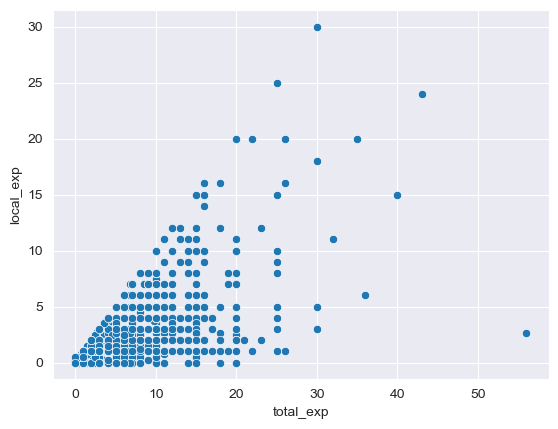

In [96]:
sns.scatterplot(data=df, x="total_exp", y="local_exp")  # scatter plot. We see that the data is now correct

In [100]:
df = df.set_index(np.arange(0, len(df)))  # we set the index again
df

,company,title,category,total_exp,local_exp,salary,signing_bonus,annual_bonus
0,opower,systems engineer,Engineering,13,2,125000,5000,0
1,walmart,senior developer,Software,15,8,65000,0,5000
2,vertical knowledge,software engineer,Software,4,1,86000,5000,6000
3,netapp,mts,Other,4,0,105000,5000,8500
4,apple,software engineer,Software,4,3,110000,5000,7000
...,...,...,...,...,...,...,...,...
1554,facebook,software engineer,Software,4,2,130000,20000,13000
1555,sparkfun electronics,junior software developer,Software,1,0,60500,0,800
1556,intel,staff software enginer,Software,6,4,164000,0,20000
1557,$2bn valuation tech company,sr. frontend eng,Web,7,1,150000,0,0


In [101]:
df[df["total_exp"]>30]

,company,title,category,total_exp,local_exp,salary,signing_bonus,annual_bonus
31,city of austin,it programmer,Other,40,15,103000,0,1500
319,gg,pres,Other,35,20,75000,2000,3000
920,ibm,advisory software engineer,Software,32,11,111000,0,1200
1340,ghgh,ghghgh,Other,56,3,565656,5656,566
1462,hewlett packard enterprise,software engineer vii,Software,36,6,206000,0,15000
1467,ãÜ___¡,asdf,Other,43,24,23423,234,2


In [102]:
df.drop(df.index[[1340, 1467]],inplace=True)  # we will delete the data where the total_exp is greater than 30 and company name is not known

<Axes: xlabel='total_exp', ylabel='local_exp'>

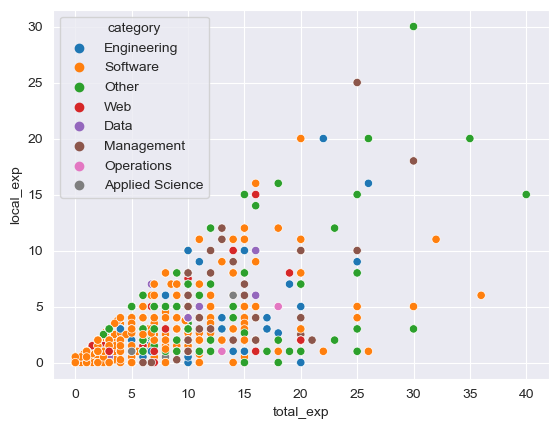

In [103]:
sns.scatterplot(data=df, x="total_exp", y="local_exp", hue="category")  # scatter plot. We see that the data is now correct

<Axes: xlabel='signing_bonus', ylabel='salary'>

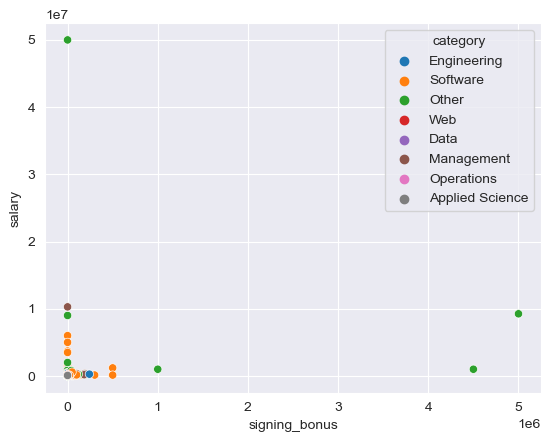

In [104]:
sns.scatterplot(data=df, x="signing_bonus", y="salary", hue="category")

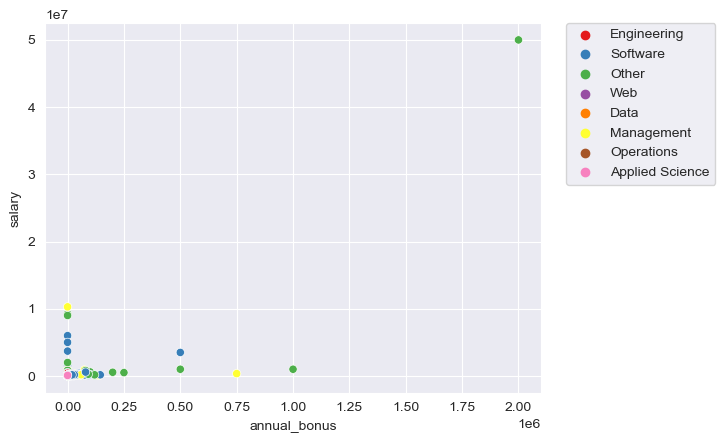

In [106]:
sns.scatterplot(data=df, x="annual_bonus", y="salary", hue="category", palette="Set1")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # to show the legend outside the graph

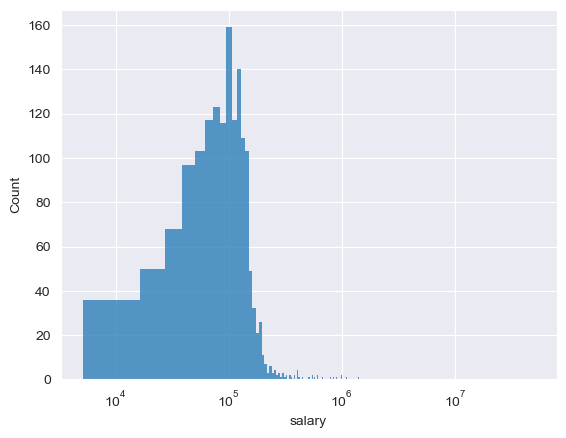

In [108]:
sns.histplot(data=df, x="salary")  # histogram
plt.xscale("log")  # to show the x axis in logarithmic scale

160 people earn more than 100000 dollars

In [109]:
len(df[df["salary"]>500_000])/ len(df)  # percentage of people earning more than 500000 dollars

0.020552344251766216

(5000.0, 240000.0)

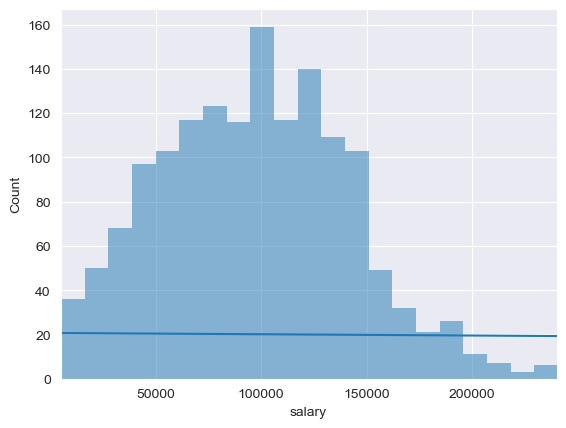

In [112]:
sns.histplot(data=df, x="salary", kde=True)  # histogram, kde=True to show the density curve
plt.xlim(5000,240000) # to show the x axis between 5000 and 100000

Countplot

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Engineering'),
  Text(1, 0, 'Software'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Web'),
  Text(4, 0, 'Data'),
  Text(5, 0, 'Management'),
  Text(6, 0, 'Operations'),
  Text(7, 0, 'Applied Science')])

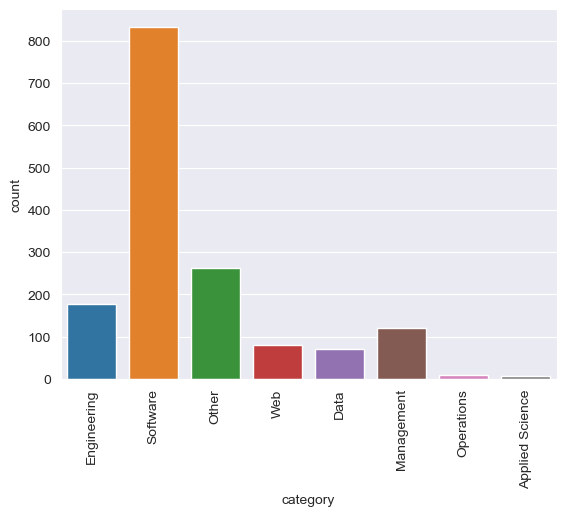

In [114]:
sns.countplot(data=df, x="category")  # countplot
plt.xticks(rotation=90)  # to rotate the x axis labels

(0.0, 1000.0)

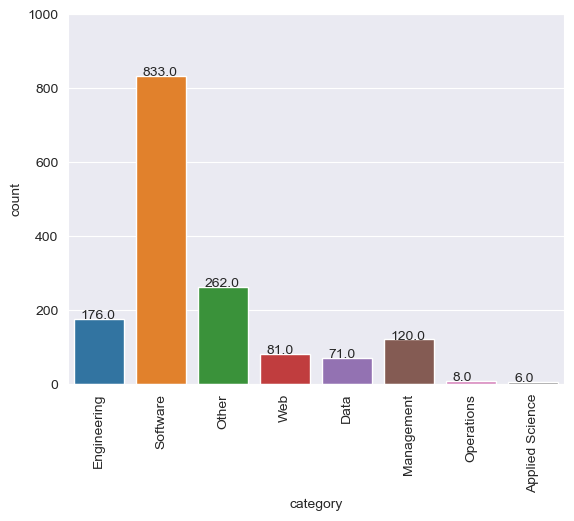

In [115]:
axes = sns.countplot(data=df, x="category")  # countplot
for p in axes.patches:
    axes.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))  # to show the number of people in each category
plt.xticks(rotation=90)  # to rotate the x axis labels
plt.ylim(0, 1000)  # to show the y axis between 0 and 1000

KDE Plot

<Axes: xlabel='local_exp', ylabel='Density'>

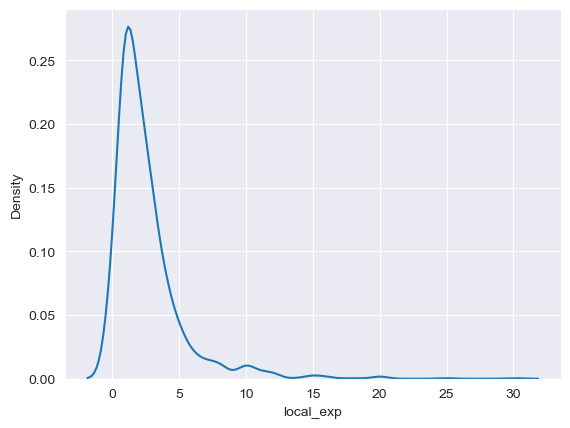

In [117]:
sns.kdeplot(data=df, x="local_exp")  # kde plot. Density curve of local_exp

<Axes: xlabel='local_exp', ylabel='Density'>

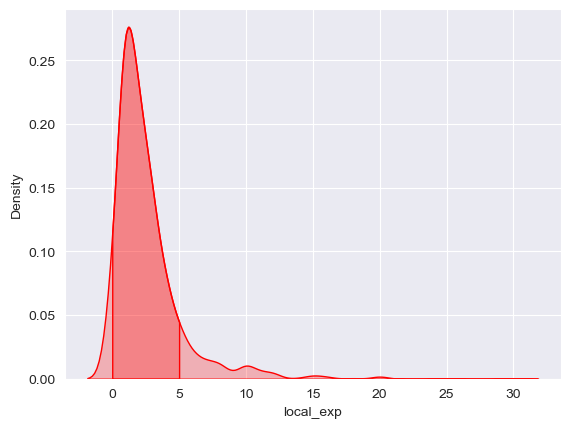

In [122]:
sns.kdeplot(data=df, x="local_exp", clip=[0,5], fill=True, color="red")  # kde plot. Density curve of local_exp between 0 and 5
sns.kdeplot(data=df, x="local_exp", fill=True, color="red") # kde plot. Density curve of local_exp.

Box Violin Plots

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Engineering'),
  Text(1, 0, 'Software'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Web'),
  Text(4, 0, 'Data'),
  Text(5, 0, 'Management'),
  Text(6, 0, 'Operations'),
  Text(7, 0, 'Applied Science')])

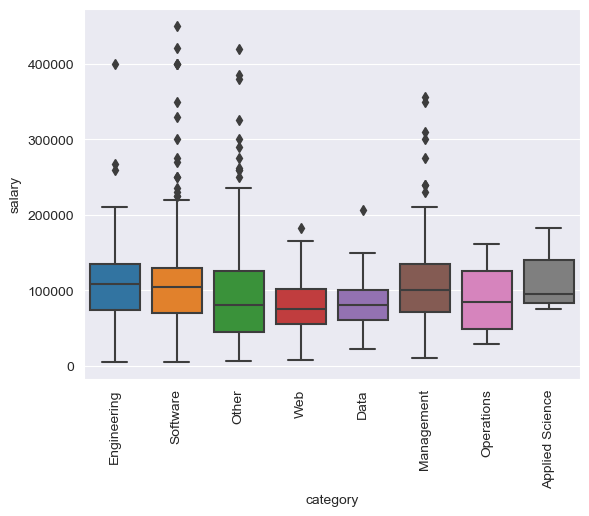

In [125]:
sns.boxplot(data=df[df["salary"]<500000], x="category", y="salary")  # box plot
plt.xticks(rotation=90)  # to rotate the x axis labels

most salaries are on the software and other side. Except for the outliers, the salaries of the web and data categories are close to each other.


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Engineering'),
  Text(1, 0, 'Software'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Web'),
  Text(4, 0, 'Data'),
  Text(5, 0, 'Management'),
  Text(6, 0, 'Operations'),
  Text(7, 0, 'Applied Science')])

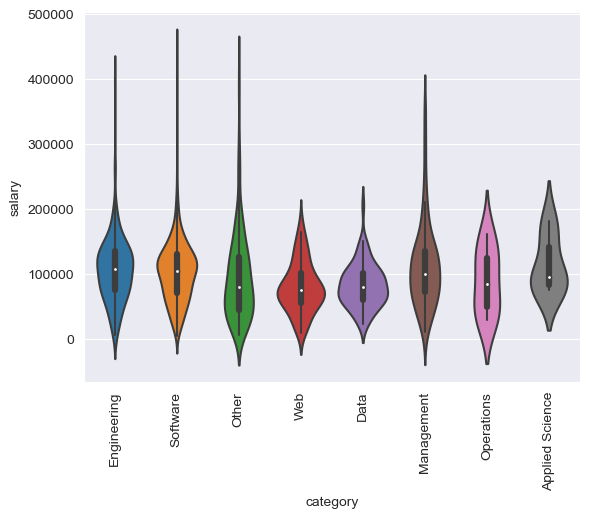

In [127]:
sns.violinplot(data=df[df["salary"]<500000], x="category", y="salary")  # violin plot: to show the density curve. The density curve is more visible than the box plot. Box and violin plots are used to show the distribution of data.
plt.xticks(rotation=90)  # to rotate the x axis labels